1. 1차원데이터분석

    1. 변수종류파악( 수치형/ 범주형/ 시간형)

    2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

    3. 시각화

    - 도수분포표/ 히스토그램/ 상자그림

2. 2차원데이터분석

    1. 공분산/ 상관계수

    2. 다중공선성확인

    3. 시각화

    - 산점도/ 회귀직선/ 히트맵

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사   
- carrier_deay : 항공사 지연 요인   
- atc_delay : ATC 항공교통관제 지연 요인   
- weather_delay : 날씨로 인한 지연 요인   

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [56]:
air_df = pd.read_csv('./data_anal_project/airline_stats.csv')
air_df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


# 1. 1차원데이터분석

## 1. 변수 탐색
- 수치형 / 범주형 변수

In [57]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


범주형 : airline   
수치형 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [58]:
air_df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [59]:
# 일부 delay 컬럼에 결측치가 존재하나 전체의 1% 미만이며 평균 계산 시 자동 제외되므로 이번 분석에서는 결과에 큰 영향을 주지 않는다고 판단함.

In [60]:
air_df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


## 2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

In [61]:
# 수치형 변수의 최대/최소/대표값
air_df.select_dtypes(include='number').describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [62]:
# 범주형 변수의 값 목록
air_df.select_dtypes(include='object')
air_df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [63]:
# 항공사 별 기술 통계 비교
air_df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

## 3. 시각화

<Axes: xlabel='airline'>

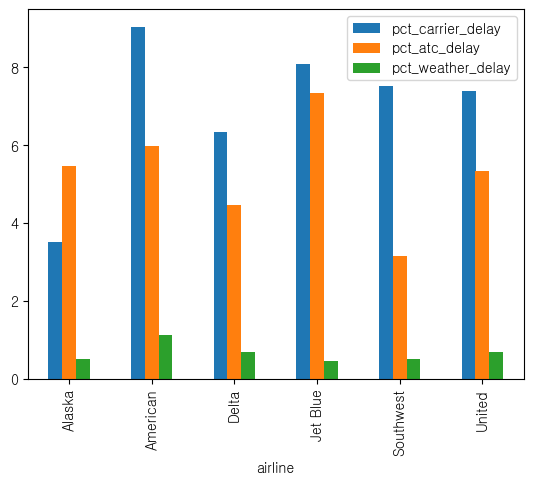

In [64]:
air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().plot(kind='bar')

도수분포표

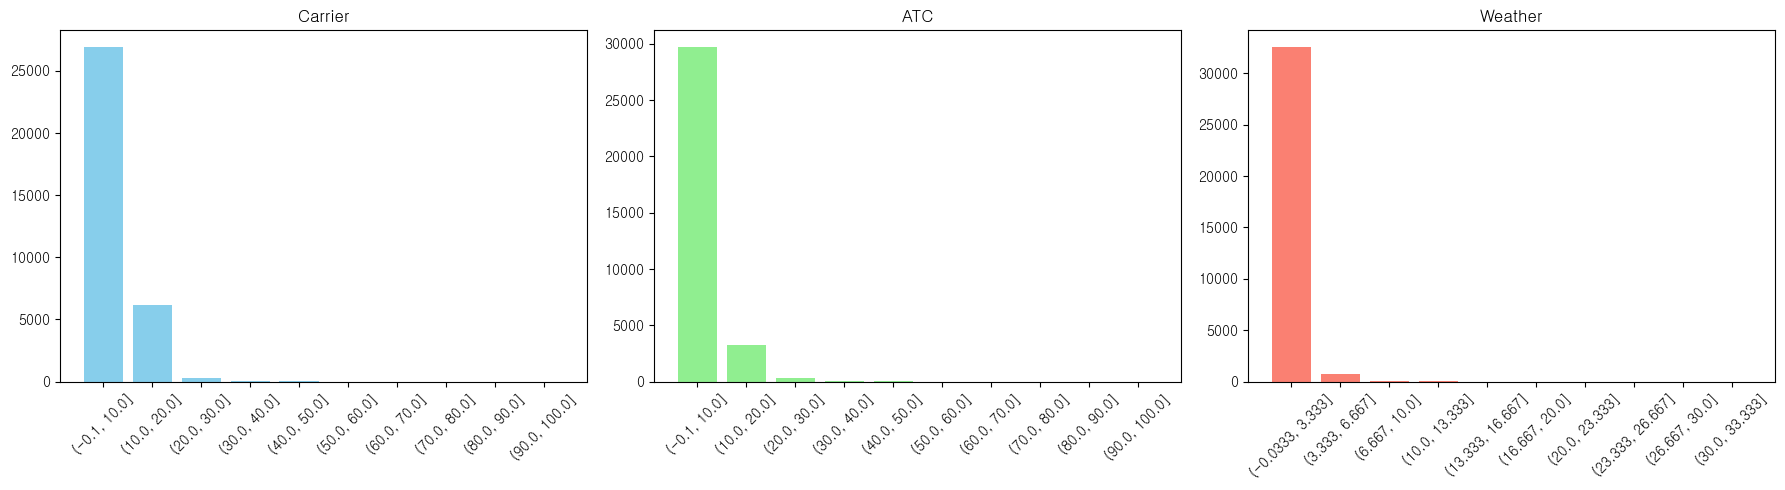

In [65]:
carrier = pd.cut(air_df['pct_carrier_delay'], bins=10).value_counts().sort_index()
atc = pd.cut(air_df['pct_atc_delay'], bins=10).value_counts().sort_index()
weather = pd.cut(air_df['pct_weather_delay'], bins=10).value_counts().sort_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# carrier
axes[0].bar(carrier.index.astype(str), carrier.values, color='skyblue')
axes[0].set_title('Carrier')
axes[0].tick_params(axis='x', rotation=45)

# atc
axes[1].bar(atc.index.astype(str), atc.values, color='lightgreen')
axes[1].set_title('ATC')
axes[1].tick_params(axis='x', rotation=45)

# weather
axes[2].bar(weather.index.astype(str), weather.values, color='salmon')
axes[2].set_title('Weather')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [66]:
pd.cut(air_df['pct_carrier_delay'], bins=10).value_counts().sort_index()
# 0~10% : 26919
# 10~20% : 6129
# 20% 초과 : 매우 드뭄 전체의 1% 정도
# 90~100% 지연률인 케이스도 5건 존재

pct_carrier_delay
(-0.1, 10.0]     26919
(10.0, 20.0]      6129
(20.0, 30.0]       325
(30.0, 40.0]        43
(40.0, 50.0]        14
(50.0, 60.0]         1
(60.0, 70.0]         2
(70.0, 80.0]         1
(80.0, 90.0]         1
(90.0, 100.0]        5
Name: count, dtype: int64

In [67]:
pd.cut(air_df['pct_atc_delay'], bins=10).value_counts().sort_index()
# 0~10% : 29717
# 10~20% : 3276
# 20% 초과 : 전체의 1.5% 정도
# 90~100% : 6건  극단값도 존재

pct_atc_delay
(-0.1, 10.0]     29717
(10.0, 20.0]      3276
(20.0, 30.0]       349
(30.0, 40.0]        71
(40.0, 50.0]        14
(50.0, 60.0]         7
(60.0, 70.0]         0
(70.0, 80.0]         0
(80.0, 90.0]         0
(90.0, 100.0]        6
Name: count, dtype: int64

In [68]:
pd.cut(air_df['pct_weather_delay'], bins=10).value_counts().sort_index()
# 0~3.3% : 32548 (거의 전부)
# 3.3~10% : 800건 정도
# 10% 이상 : 거의 없음
# 날씨로 인한 지연은 대부분 없다

pct_weather_delay
(-0.0333, 3.333]    32548
(3.333, 6.667]        786
(6.667, 10.0]          76
(10.0, 13.333]         21
(13.333, 16.667]        3
(16.667, 20.0]          2
(20.0, 23.333]          1
(23.333, 26.667]        2
(26.667, 30.0]          0
(30.0, 33.333]          1
Name: count, dtype: int64

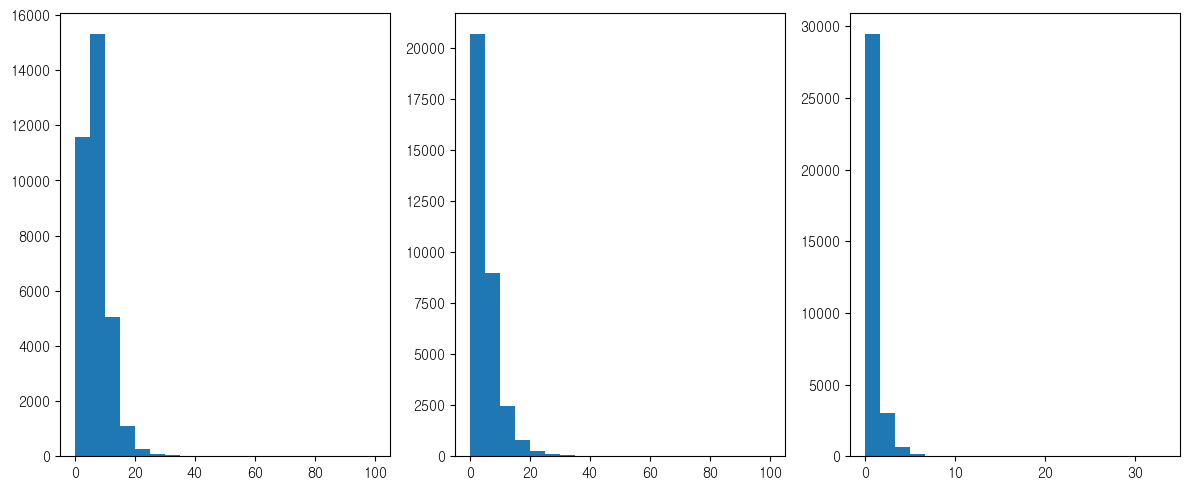

In [69]:
fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.hist(data=air_df, x='pct_carrier_delay', bins=20)
axes2.hist(data=air_df, x='pct_atc_delay', bins=20)
axes3.hist(data=air_df, x='pct_weather_delay', bins=20)

plt.tight_layout()
plt.show()

In [70]:
# pct_carrier_delay (항공사 자체 지연률)
# 0~10% 구간에 매우 집중

# pct_atc_delay (관제탑 지연률)
# 자체 지연률보다 더 좁게 몰려 있음
# 0~5% 사이가 압도적

# pct_weather_delay (날씨)
# 완전 왼쪽에 몰림 0~3%가 대부분

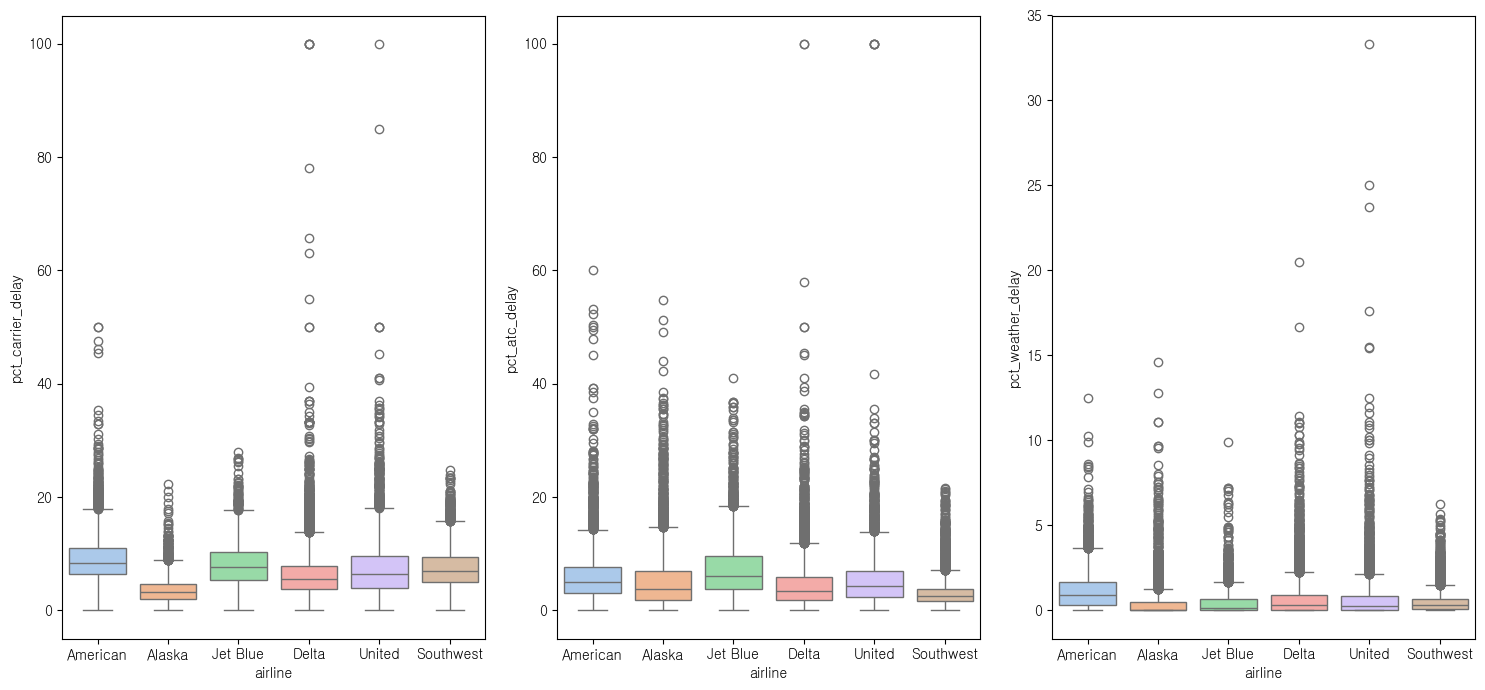

In [71]:
fig = plt.figure(figsize=(15, 7))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

sns.boxplot(data=air_df, x='airline', y='pct_carrier_delay', palette='pastel', ax=axes1)
sns.boxplot(data=air_df, x='airline', y='pct_atc_delay', palette='pastel', ax=axes2)
sns.boxplot(data=air_df, x='airline', y='pct_weather_delay', palette='pastel', ax=axes3)

plt.tight_layout()
plt.show()

In [72]:
# pct_carrier_delay: 항공사 자체 문제
# American과 Jet Blue는 지연이 상대적으로 많음
# Alaska는 중앙값이 제일 낮고 박스도 낮게 위치 -> 지연이 적고 안정적

# pct_atc_delay: 관제 시스템 지연
# Jet Blue가 관제 지연에서 평균적으로 가장 높은 편
# Southwest는 중앙값이 낮고 이상치 범위도 낮아 보여서 관제 시스템 영향을 적게 받는 항공사로 보임

# pct_weather_delay: 기상 지연
# 모든 항공사에서 기상 지연의 중앙값이 낮음
# United는 이상치가 상대적으로 많이 차이남

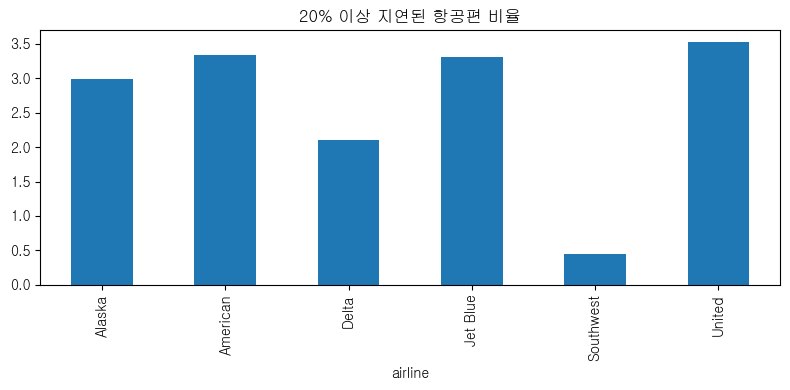

In [73]:
air_delay_df = air_df[
    (air_df['pct_carrier_delay'] >= 20) | (air_df['pct_atc_delay'] >= 20) | (air_df['pct_weather_delay'] >= 20)
]

air_delay_counts = air_delay_df['airline'].value_counts().sort_index()
total_counts = air_df['airline'].value_counts().sort_index()
air_delay_rate = (air_delay_counts / total_counts * 100)

df = pd.DataFrame({
    'total_counts': total_counts,
    'air_delay': air_delay_counts,
    'air_delay_rate(%)': air_delay_rate
})

df['air_delay_rate(%)'].plot(kind='bar', figsize=(8,4), title='20% 이상 지연된 항공편 비율')
plt.tight_layout()
plt.show()

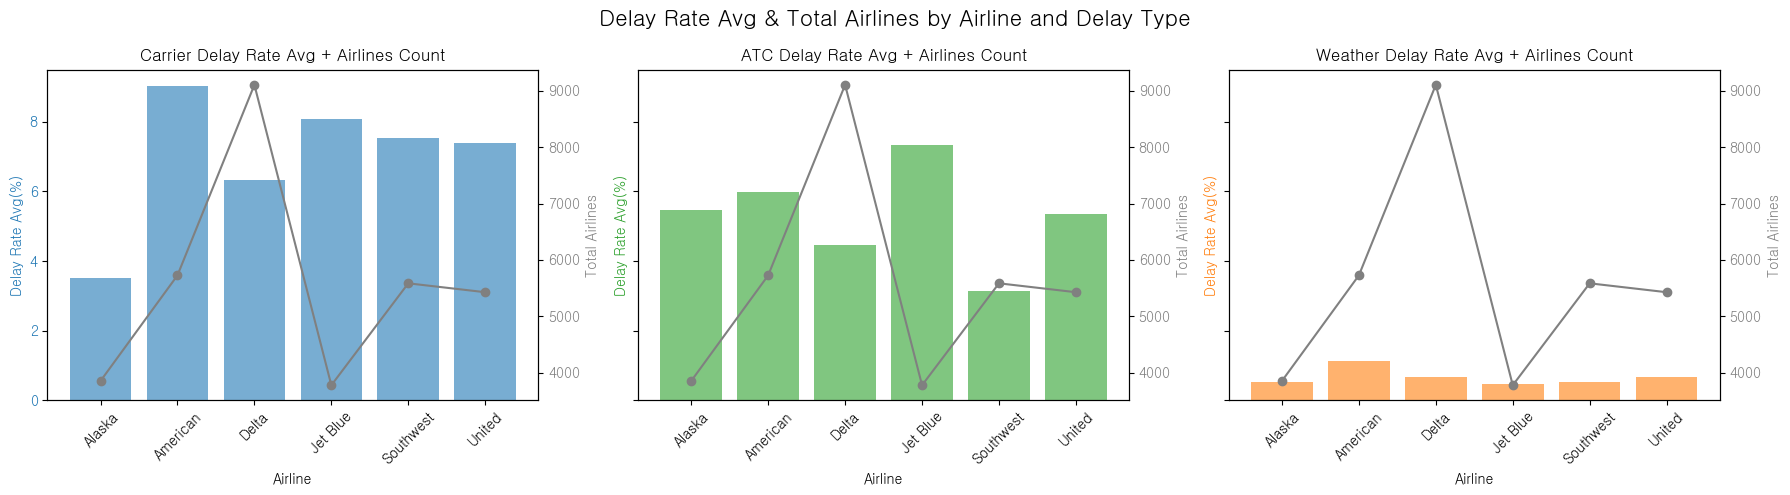

In [74]:
grouped_df = air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

grouped_df['total_Airlines'] = air_df['airline'].value_counts().sort_index()

delay_types = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
titles = ['Carrier', 'ATC', 'Weather']
colors = ['tab:blue', 'tab:green', 'tab:orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (col, title, color) in enumerate(zip(delay_types, titles, colors)):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.bar(grouped_df.index, grouped_df[col], color=color, alpha=0.6)
    ax1.set_title(f'{title} Delay Rate Avg + Airlines Count')
    ax1.set_xlabel('Airline')
    ax1.set_ylabel('Delay Rate Avg(%)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation=45)

    ax2.plot(grouped_df.index, grouped_df['total_Airlines'], color='gray', marker='o')
    ax2.set_ylabel('Total Airlines', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

plt.suptitle('Delay Rate Avg & Total Airlines by Airline and Delay Type', fontsize=16)
plt.tight_layout()
plt.show()

In [75]:
# 전체적 분포
# Southwest: 세 가지 지연 유형 모두에서 분산이 작고 중앙값이 낮음 -> 안정적 운항
# United, Jet Blue, American: carrier/atc delay 이상치가 많고 IQR이 큼
# -> Delta는 중간 정도?

# 20% 이상 지연
# Southwest: 1% 이하
# United, Jet Blue, American: 3% 이상
# Delta 상대적으로는 안정적

# 2. 2차원 데이터 분석

## 1. 상관계수 분석

In [76]:
corr = air_df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()
print(corr)
# 독립적으로 보임

                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.144474           0.161474
pct_atc_delay               0.144474       1.000000           0.091729
pct_weather_delay           0.161474       0.091729           1.000000


## 2.다중공선성 분석

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = air_df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].dropna()

X_const = add_constant(X)

vif_df = pd.DataFrame()
vif_df['Variable'] = X_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

            Variable       VIF
0              const  4.302727
1  pct_carrier_delay  1.044963
2      pct_atc_delay  1.026353
3  pct_weather_delay  1.031834


In [78]:
grouped_df = air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()
grouped_df['total_flights'] = air_df['airline'].value_counts().sort_index()
grouped_df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,total_flights
airline,,,,
Alaska,3.521889,5.472672,0.513497,3851
American,9.042180,5.993529,1.122920,5725
Delta,6.333460,4.462978,0.680765,9107
Jet Blue,8.081843,7.345231,0.465327,3775
Southwest,7.521997,3.147019,0.512611,5584
United,7.398833,5.348133,0.680697,5426


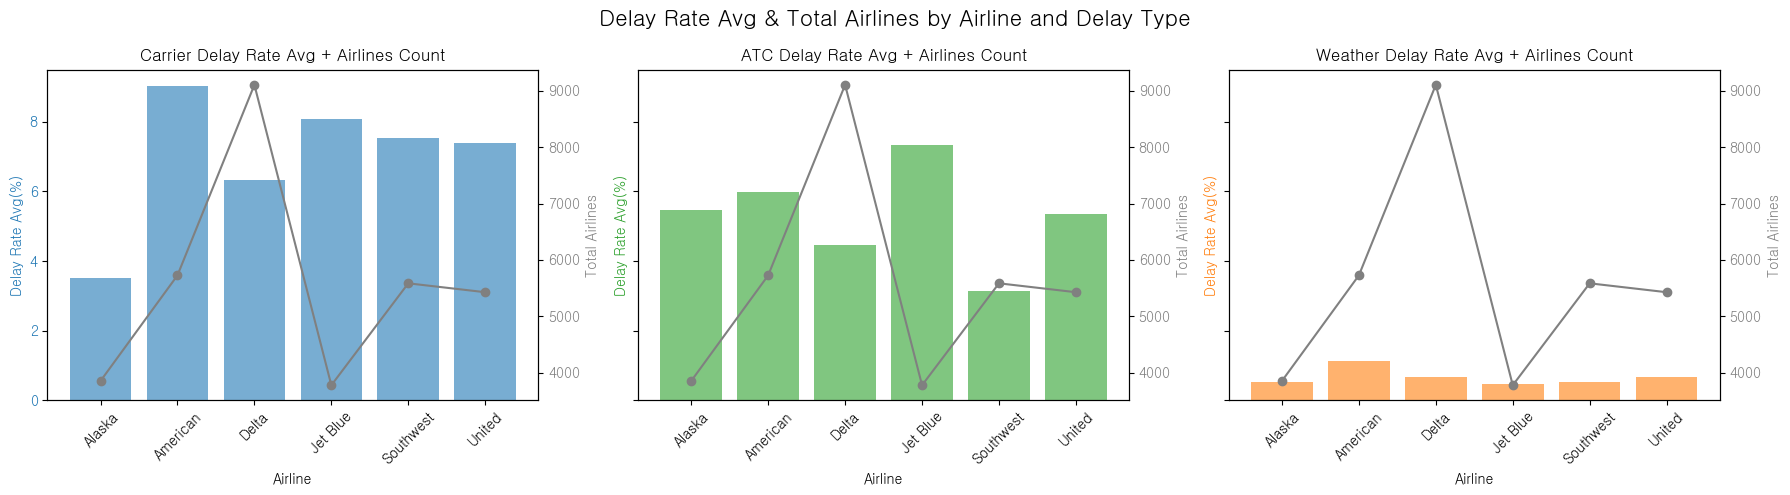

In [79]:
grouped_df = air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

grouped_df['total_Airlines'] = air_df['airline'].value_counts().sort_index()

delay_types = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
titles = ['Carrier', 'ATC', 'Weather']
colors = ['tab:blue', 'tab:green', 'tab:orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (col, title, color) in enumerate(zip(delay_types, titles, colors)):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    ax1.bar(grouped_df.index, grouped_df[col], color=color, alpha=0.6)
    ax1.set_title(f'{title} Delay Rate Avg + Airlines Count')
    ax1.set_xlabel('Airline')
    ax1.set_ylabel('Delay Rate Avg(%)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation=45)

    ax2.plot(grouped_df.index, grouped_df['total_Airlines'], color='gray', marker='o')
    ax2.set_ylabel('Total Airlines', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

plt.suptitle('Delay Rate Avg & Total Airlines by Airline and Delay Type', fontsize=16)
plt.tight_layout()
plt.show()

# 3. 인사이트 도출

항공사별 지연률 + 항공편 수 기반

| 항공사               | 평균 지연률           | 항공편 수 | 해석                                                    |
| ----------------- | ---------------- | ----- | ----------------------------------------------------- |
| **American**      | 높음 (3종 모두)       | 많음    |  지연도 심하고 영향력도 크다 -> 개선 필요                     |
| **Jet Blue**      | carrier delay 높음 | 적음    |  지연 품질은 낮지만 전체 영향은 작음                                |
| **Delta**         | 낮음 (carrier 제외)  | 가장 많음 |  운항량이 많지만 비교적 안정적                                |
| **Southwest**     | 낮음 (전반적으로)       | 많음    |  가장 균형 잡힌 운영 → 우수                         |
| **Weather delay** | 전체적으로 낮음         | -     |  지연 원인 중 weather는 영향 적음 -> carrier, atc 중심 분석 필요 |


지연 원인별 특성

| 지연 유형             | 특징                    | 예시                       |
| ----------------- | --------------------- | ------------------------ |
| **Carrier delay** | 항공사 내부 요인 (정비, 인력 등)  | Jet Blue, American 높음    |
| **ATC delay**     | 관제 시스템, 공역 혼잡 등 외부 요인 | Delta, American 상대적으로 높음 |
| **Weather delay** | 기상 요인 → 전반적으로 낮음      | 모든 항공사에서 1\~2% 수준        |


정책적 개선안 (제안)   
American: 내부 정비 및 운항 관리 시스템 개선 필요   
Jet Blue: 항공편 수는 적지만 높은 지연률! -> 개선 필요   
전체적으로 weather delay는 낮아 자원은 carrier/atc 대응으로 하는게 good   
Delta, Southwest는 우수 사례!   

# 4. 결론 및 제언

지연률이 높으면서 항공편 수도 많은 항공사(American)는   
정책적으로 대응 우선순위가 높고   
지연률은 높지만 항공편 수가 적은 항공사(Jet Blue)는   
관리 중심의 개선이 적합하다   

지연 원인별로는   
carrier 및 ATC delay가 주요 이슈로 나타났고   
weather delay는 전체적으로 낮아 우선 대응 대상은 아님을 확인 

후속 분석 방향 (확장 가능)   
요일, 시간대, 공항별로 지연률을 분석해보고 예측을 해보는 것도 가능할 듯